# Inheritance

So now that you know how to build classes, operator overloading and iterators, is time for one of the biggest topics in Object Oriented Programming: Inheritance.

This notebook has information obtained form https://www.python-course.eu

We will review how inheritance works, then we'll talk about multi inheritance and finally we'll see examples of both.

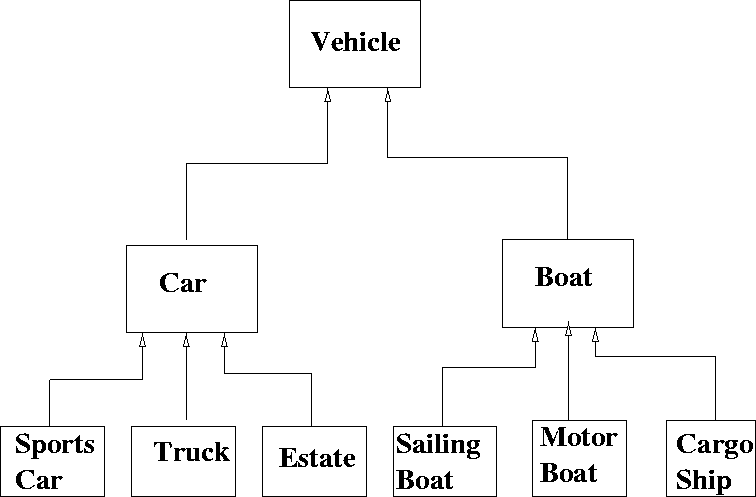

Now what is inheritance. No is not an amount of money you get after a relative passed away. In this case the natural parallel would be genetic inheritance. In object oriented programming inheritance is a property of objects to share methods and attributes with another object hierarchically. Not every programming language applies this concept the same ways so keep in mind that terms may change depending on the context.

There are two terms you need to get familiar with:

1) Superclass/ Ancestor Are root classes or "parents" of other classes. They might be usable directly or they can be abstract classes, which just provide structure to the classes derived from it but are not really aplicable into the main code.

2) Subclasses/ Descendants Are derived classes that inherit attributes from a superclass. Now you can have multilevel inheritance so a subclass can be a superclass as well.

There's really not much difference from the way you declare a superclass to every other class, but subclasses follow this general structure:

class DerivedClassName(BaseClassName):

    pass
    
    
Let's dive in with an example:

In [1]:
class Person:

    def __init__(self, first, last):
        self.firstname = first
        self.lastname = last

    def Name(self):
        return self.firstname + " " + self.lastname

class Employee(Person):

    def __init__(self, first, last, staffnum):
        super().__init__(first, last)
        #Person.__init__(self,first, last)
        self.staffnumber = staffnum

    def GetEmployee(self):
        return self.Name() + ", " +  self.staffnumber

x = Person("Marge", "Simpson")
y = Employee("Homer", "Simpson", "1007")

print(x.Name())
print(y.GetEmployee())
print(y.Name())

Marge Simpson
Homer Simpson, 1007
Homer Simpson


Employee is a subclass of Person. That means that unless the operators are overloaded, Employee has all the methods and attributes of Person (remember that methods=operators, one is a Python term the other an OOP term). 

In this case we are overriding the init() method of Person to also include a staff number. However the name() method doesn't get overloaded or overridden and Employee still inherits it. Employee also has a method called GetEmployee() that is not shared with Person. LEt's look at another example where employee overloads all the methods in person instead of creating a new one:

In [2]:
class Person:

    def __init__(self, first, last, age):
        self.firstname = first
        self.lastname = last
        self.age = age

    def __str__(self):
        return self.firstname + " " + self.lastname + ", " + str(self.age)

class Employee(Person):

    def __init__(self, first, last, age, staffnum):
        super().__init__(first, last, age)
        self.staffnumber = staffnum

    def __str__(self):
        return super().__str__() + ", " +  self.staffnumber


x = Person("Marge", "Simpson", 36)
y = Employee("Homer", "Simpson", 28, "1007")

print(x)
print(y)

Marge Simpson, 36
Homer Simpson, 28, 1007


In this case instead of creating a GetEmployee method, we overloaded a str() method to add the staff number. This code does exactly the same thing as the previous one but fully uses the concept of inheritance. Using inheritance correctly requires good design of the classes. For big projects the inheritance would usually be explained in the documentation so developers know which suprclasses to inherit from.

## Inheritance design rules

Now let's look at some design rules. So far we have inherited the init() method and the str() method as well. In other languages such as Java and C, you are limited to accessing variables through methods. That means that if you try to access and modify the self.name from the Person class through Employee, you would get an exception. Python doesn't do that, but it's still considered bad programming that goes against everything OOP holds true and valuable.

To solve this problem, each class should define methods to access/set all the
attributes it defines. That is why in there are reset/inc/value_of methods in
the Counter class: so the ModularCounter class can examine/update the _value
attribute defined in Counter. So,

1) If a class adds an attribute to an object (e.g., in \__init__) then methods
defined in only that class should access the attribute directly.

2) If other classes (including derived/subclasses) need to access/update the
information stored in that attribute, then the defining class should define
methods that do the job, which the other class should call.

This introduces a wonderful concept of OOP called

## Encapsulation

Encapsulation is best explained with how we drive a car. When we get on a car, we can control acceleration by pressing the gas pedal, and break by pressing the break pedal. However, we have no control over the different variables and mechanisms that makes a car accelerate or break. All those attributes and methods are __private__ and you can only access them by opening the hood and looking inside the object.

The same applies for object oriented programming. Encapsulation is a principle (enforced by languages like Java but optional in Python) that dictates that some methods and attributes ought to be private, and accessed only within the class. For that we need to determine the __interface__ for the class that will allow some attributes to be read or written. Here's an example:

In [5]:
class Car:
 
    def __init__(self):
        self.__updateSoftware()
 
    def drive(self):
        print ('driving')
 
    def __updateSoftware(self):
        print ('updating software')

redcar = Car()
redcar.drive()
redcar._Car__updateSoftware() 

updating software
driving
updating software


The \__updateSoftware method is only accessible form inside Car. You can't call it from your code. That is because this method is __private__. (you can actually access the method using redcar._Car\__updateSoftware(), but that is because Python allows you to bypass encapsulation. But this is bad habit and you should stay away from doing it)

Here's a general sense on how private classes and methods work:


public methods	Accessible from anywhere

private methods	Accessible only in their own class. starts with two underscores

public variables	Accessible from anywhere

private variables	Accesible only in their own class or by a method if defined. starts with two underscores

Now what about variables. As per encapsulation principle you should not access variables directly, they should all be private. The right way to access a variable should be through a method, like so 

In [6]:
class Car:
 
    __maxspeed = 0
    __name = ""
 
    def __init__(self):
        self.__maxspeed = 200
        self.__name = "Supercar"
 
    def drive(self):
        print ('driving. maxspeed ' + str(self.__maxspeed))
 
    def setMaxSpeed(self,speed):
        self.__maxspeed = speed
 
redcar = Car()
redcar.drive()
redcar.setMaxSpeed(320)
redcar.drive()

driving. maxspeed 200
driving. maxspeed 320


The maxspeed attribute can only be modified by the setMaxSpeed. Which brings us to the wonderful world of:
    
## Setters and Getters

Setters and Getters are encapsulation put into practice. No mind you these are general guidelines on how to do encapsulation. You could have a method called accelerate() that makes more sense than setSpeed(), but for coherence let's assume that every public attribute is read using a get method and written using a set method.

Let's talk Java for a little bit. In java, all attributes of a class have to be private. Whenever you add a new attribute you generally creat its setter and getter. Most IDEs will even prompt you to do it automatically. 

Arguably, this is not the pythonic way to do it. In python the attributes should be public. (I know I just told you something different. Some will argue that the pythonic way is the only right way to do it. Personally I think you should know both paradigms in order to be able to demonstrate you understand the universal concept of encapsulation, not just how one specific language does it).

Now, for our class Car, we are forcing Python to behave in a Javaesque way. A pythonic class would look more like this:

In [7]:
class Car:
 
    maxspeed = 0
    __name = ""
 
    def __init__(self):
        self.maxspeed = 200
        self.__name = "Supercar"
 
    def drive(self):
        print ('driving. maxspeed ' + str(self.maxspeed))

 
redcar = Car()
redcar.drive()
redcar.maxspeed=300
redcar.drive()

driving. maxspeed 200
driving. maxspeed 300


Notice that name is still private because as per the class definition we don't intend name to be ever read or written directly. Does this mean that encapsulation is mute in Python? Not really, is just that it is implemented in a different way. We use decorators which we will learn about in further lessons but for the sake of context I'll introduce you to some of them.

## Properties

Instead of setters and getters, Python uses properties. Let's see how this works:

In [8]:
class Car:
 
    maxspeed = 0
    __name = ""
 
    def __init__(self):
        self.maxspeed = 200
        self.__name = "Supercar"
    @property
    def maxspeed(self):
        return self.__maxspeed
    @maxspeed.setter
    def maxspeed(self, maxspeed):
        if maxspeed<0:
            print('You can\'t have a negative speed')
        else:
            self.__maxspeed=maxspeed
 
    def drive(self):
        print ('driving. maxspeed ' + str(self.maxspeed))

 
redcar = Car()
redcar.drive()
redcar.maxspeed=300
redcar.drive()
redcar.maxspeed=-1

driving. maxspeed 200
driving. maxspeed 300
You can't have a negative speed


The tag property is called a decorator, which allows a function to have another function as an argument (nested functions). Is okay if you are confused now, we haven't really learned about this topic but for now you just need know that property allows us to modify the way maxspeed is accessed and establish a condition on what is acceptable.

As you write more complicated programs, you will need to make encapsulation a standard to ensure that your code doesn't break just because a worng value was written for an attribute.

## Public vs Private

Returning to the topic of inheritance, private and public attributes are inherited to the subclasses. But you still need to decide when to use each, and here is a guideline:

1) Will the attribute be needed directly by the users of your class? (if yes it should be public)

2) Is my code sensistive to the value that the user assigns to the attribute? (if yes then you need to use a property)

# Multi Inheritance

Ok so we learned about inheritance and we learned about encapsulation. Now let's look at multi inheritance. Not all OOP languages support full multi inheritance. For example Java only allows for inheriting specific interfaces. But Python allows a class to be fathered by two or more superclasses. As you guessed it, multi inheritance is declared as follows:

class SubclassName(BaseClass1, BaseClass2, BaseClass3, ...):
    pass
    
And a class with multiple parents will inherit them to its subclasses. Now let's assume we have a clock with a calendar and that it will inherit methods and attributes from a superclass called Clock and a superclass called Calendar. Here's our Clock class:


In [ ]:
""" 
The class Clock is used to simulate a clock.
"""

class Clock(object):

    def __init__(self, hours, minutes, seconds):
        """
        The paramaters hours, minutes and seconds have to be 
        integers and must satisfy the following equations:
        0 <= h < 24
        0 <= m < 60
        0 <= s < 60
        """

        self.set_Clock(hours, minutes, seconds)

    def set_Clock(self, hours, minutes, seconds):
        """
        The parameters hours, minutes and seconds have to be 
        integers and must satisfy the following equations:
        0 <= h < 24
        0 <= m < 60
        0 <= s < 60
        """

        if type(hours) == int and 0 <= hours and hours < 24:
            self._hours = hours
        else:
            raise TypeError("Hours have to be integers between 0 and 23!")
        if type(minutes) == int and 0 <= minutes and minutes < 60:
            self.__minutes = minutes 
        else:
            raise TypeError("Minutes have to be integers between 0 and 59!")
        if type(seconds) == int and 0 <= seconds and seconds < 60:
            self.__seconds = seconds
        else:
            raise TypeError("Seconds have to be integers between 0 and 59!")

    def __str__(self):
        return "{0:02d}:{1:02d}:{2:02d}".format(self._hours,
                                                self.__minutes,
                                                self.__seconds)

    def tick(self):
        """
        This method lets the clock "tick", this means that the 
        internal time will be advanced by one second.

        Examples:
        >>> x = Clock(12,59,59)
        >>> print(x)
        12:59:59
        >>> x.tick()
        >>> print(x)
        13:00:00
        >>> x.tick()
        >>> print(x)
        13:00:01
        """

        if self.__seconds == 59:
            self.__seconds = 0
            if self.__minutes == 59:
                self.__minutes = 0
                if self._hours == 23:
                    self._hours = 0
                else:
                    self._hours += 1
            else:
                self.__minutes += 1
        else:
            self.__seconds += 1


if __name__ == "__main__":
    x = Clock(23,59,59)
    print(x)
    x.tick()
    print(x)
    y = str(x)
    print(type(y))

All that fancy code adds format and plausability to inputed time. But for all intents and purposes this is a clock. You should understand all the code here so you can analyze it afterwards. Now here's a fancy Calendar class.

In [ ]:
""" 
The class Calendar implements a calendar.   
"""

class Calendar(object):

    months = (31,28,31,30,31,30,31,31,30,31,30,31)
    date_style = "British"

    @staticmethod
    def leapyear(year):
        """ 
        The method leapyear returns True if the parameter year
        is a leap year, False otherwise
        """
        if not year % 4 == 0:
            return False
        elif not year % 100 == 0:
            return True
        elif not year % 400 == 0:
            return False
        else:
            return True


    def __init__(self, d, m, y):
        """
        d, m, y have to be integer values and year has to be 
        a four digit year number
        """

        self.set_Calendar(d,m,y)


    def set_Calendar(self, d, m, y):
        """
        d, m, y have to be integer values and year has to be 
        a four digit year number
        """

        if type(d) == int and type(m) == int and type(y) == int:
            self.__days = d
            self.__months = m
            self.__years = y
        else:
            raise TypeError("d, m, y have to be integers!")


    def __str__(self):
        if Calendar.date_style == "British":
            return "{0:02d}/{1:02d}/{2:4d}".format(self.__days,
                                                   self.__months,
                                                   self.__years)
        else: 
            # assuming American style
            return "{0:02d}/{1:02d}/{2:4d}".format(self.__months,
                                                   self.__days,
                                                   self.__years)



    def advance(self):
        """
        This method advances to the next date.
        """

        max_days = Calendar.months[self.__months-1]
        if self.__months == 2 and Calendar.leapyear(self.__years):
            max_days += 1
        if self.__days == max_days:
            self.__days= 1
            if self.__months == 12:
                self.__months = 1
                self.__years += 1
            else:
                self.__months += 1
        else:
            self.__days += 1


if __name__ == "__main__":
    x = Calendar(31,12,2012)
    print(x, end=" ")
    x.advance()
    print("after applying advance: ", x)
    print("2012 was a leapyear:")
    x = Calendar(28,2,2012)
    print(x, end=" ")
    x.advance()
    print("after applying advance: ", x)
    x = Calendar(28,2,2013)
    print(x, end=" ")
    x.advance()
    print("after applying advance: ", x)
    print("1900 no leapyear: number divisible by 100 but not by 400: ")
    x = Calendar(28,2,1900)
    print(x, end=" ")
    x.advance()
    print("after applying advance: ", x)
    print("2000 was a leapyear, because number divisibe by 400: ")
    x = Calendar(28,2,2000)
    print(x, end=" ")
    x.advance()
    print("after applying advance: ", x)
    print("Switching to American date style: ")
    Calendar.date_style = "American"
    print("after applying advance: ", x)  

Now let's implement our multiple inheritance with our CalendarClock:

In [ ]:
""" 
Modul, which implements the class CalendarClock.
"""

class CalendarClock(Clock, Calendar):
    """ 
        The class CalendarClock implements a clock with integrated 
        calendar. It's a case of multiple inheritance, as it inherits 
        both from Clock and Calendar      
    """

    def __init__(self,day, month, year, hour, minute, second):
        Clock.__init__(self,hour, minute, second)
        Calendar.__init__(self,day, month, year)



    def __str__(self):
        return Calendar.__str__(self) + ", " + Clock.__str__(self)


if __name__ == "__main__":
    x = CalendarClock(31,12,2013,23,59,59)
    print("One tick from ",x, end=" ")
    x.tick()
    print("to ", x)

    x = CalendarClock(28,2,1900,23,59,59)
    print("One tick from ",x, end=" ")
    x.tick()
    print("to ", x)

    x = CalendarClock(28,2,2000,23,59,59)
    print("One tick from ",x, end=" ")
    x.tick()
    print("to ", x)

    x = CalendarClock(7,2,2013,13,55,40)
    print("One tick from ",x, end=" ")
    x.tick()
    print("to ", x)

Now let's see. We are overloading the init() class to take in time and date and that's it. All the methods from Calendar and Clock were inherited. And just like that multi-inheritance is applied.

### The diamond problem

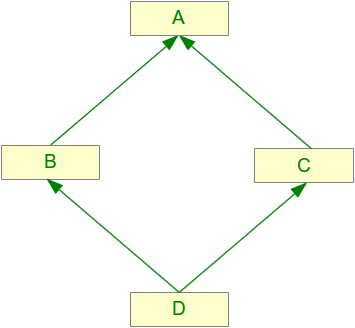

The diamond problem is the favorite conundrum for oppositors of multiple inheritance. If B and C are subclasses of A, and have overriden methods of A, and then D inherits from B and C, then which method will D inherit?  Let's check it out

In [ ]:
class A:
    def m(self):
        print("m of A called")

class B(A):
    def m(self):
        print("m of B called")
    
class C(A):
    def m(self):
        print("m of C called")

class D(B,C):
    pass

d=D()
print(d)
d.m()

Interesting, D inheritted the method from B and ignored A and C. This is because of the order of inheritance, notice that D inherits from B first (since inheritance is in the form of B,C) so the first class supercedes the second.

But what about if B doesn't override A, wht will happen?

In [ ]:
class A:
    def m(self):
        print("m of A called")

class B(A):
    pass
    
class C(A):
    def m(self):
        print("m of C called")

class D(B,C):
    pass

x = D()
x.m()

We get C. That is because children supercede fathers in inheritance, so whil B didn't overload, C did. (Note: In Python 2 this would have been m of A called because inheritance obeys the first parent and if the first parent doesn't overload then it goes to it's parent.)

Now we can also make D inherit from all three classes:

In [ ]:
class A:
    def m(self):
        print("m of A called")

class B(A):
    def m(self):
        print("m of B called")
        A.m(self)
    
class C(A):
    def m(self):
        print("m of C called")
        A.m(self)

class D(B,C):
    def m(self):
        print("m of D called")
        B.m(self)
        C.m(self)
        
x = D()
x.m()

There is one problem though, A is called twice, once per inheritance level. This is not right, let's solve it by using the super() function

In [ ]:
class A:
    def m(self):
        print("m of A called")

class B(A):
    def m(self):
        print("m of B called")
        super().m()
    
class C(A):
    def m(self):
        print("m of C called")
        super().m()

class D(B,C):
    def m(self):
        print("m of D called")
        super().m()
x = D()
x.m()

The super function calls upon the method from the superclass following somehting called method resolution order. What's happening here is that D is calling B, which is calling A. When it calls C it doesn't call A again because B supercedes C.

## Polymorphism

Polymorphism means multiple forms. It is the ability to have the same interface for different underlying forms. Basically you can have the same method name but with different behaviors.

In [ ]:
def f(x, y):
    print("values: ", x, y)

f(42, 43)
f(42, 43.7) 
f(42.3, 43)
f(42.0, 43.9)
f([23,24],23)

Python handles polymorhism implicitly which makes for a very elegant implementation. In this case f() can take in ints or floats without having to declare a method for each one. We can even use lists how crazy!!!!

## Examples of inheritance

The following class inherits a dictionary and overloads some operators to it

In [12]:
class pdefaultdict(dict):
    def __init__(self,default_factory=None,initial_dict=[],**kargs):
        dict.__init__(self,initial_dict,**kargs) # call to initialize base-class
        self._default_factory = default_factory  # used in overridden methods
        
    def __repr__(self):
        return 'pdefaultdict('+str(self._default_factory)+','+dict.__repr__(self)+')'

    # When accessing d[key] the inherited method __getitem__ is
    #   called; if it finds key is not in the dictionary, it calls
    #   self.__missing__(key), returns the result of executing this
    #   method, which uses default_factory, if present, to create a
    #   value associated with d[key] and return that value
    def __missing__(self,key):
        if self._default_factory == None:
            dict.__missing__(self,key)       # same as: raise KeyError(str(key))
        result    = self._default_factory()  # Call default, with no arguments
        self[key] = result		     # Store it in the pdefaultdict
        return result			     # Return a reference to it

x = pdefaultdict(list)
print(x._default_factory)
x['a'].append('x')
print(x)
y=dict()
y['a'].append('y')
print(y)


<class 'list'>
pdefaultdict(<class 'list'>,{'a': ['x']})


KeyError: 'a'

 (1) The standard dict.\__init__ method has default-value parameters (a) an
  iterable of items to pre-load the dictionary and (b) any number of item
  parameters of the form key=value (collected in **kargs and added to the
  dictionary after the pre-loaded items).

  IMPORTANT: We don't have to know how dict.\__init__ processes such data. We
  do need to be aware of what arguments it expects/processes, and supply
  parameters for these arguments to pdefaultdict.\__init__, so its can pass them
  along to dict.\__init__ for real processing (just like init_value in Counter).

  The pdefaultdict.\__init__ method also has an extra default_factory
  parameter: it uses its second two parameters to call dict.\__init__ and then
  also stores default_factory as an attribute the newly constructed pdefauldict
  object, where it is used in the overridden methods \__repr__ and \__missing___.

  (2) The pdefaultdict.\__repr__ method returns the appropriate string, including
  the name 'pdefaultdict', the special reference to a class/function to call
  for missing keys, and the current contents of the dictionary . Of special
  interest is that fact that there is an explicit call to dict.\__repr__(self)
  in this method, which overrides \__repr__, to show the dict part of the
  pdefaultdict.

  (3) The pdefaultdict.\__missing__ method supplies the main difference 
  between dicts and defaultdicts, by overriding the dict.\__missing__ method
  (which in dict always raises KeyError): here, so long as self.default_factory
  is not None (meaning an argument has been supplied to this parameter in its
  \__init__), it is called to produce an initial value to associate with the
  missing key.

  (4) Any other operator/method applied to a pdefaultdict object executes the
  corresponding method inherited from dict: there are very many of these
  inherited (and not overridden) methods.
  
  ## Multiple inheritance
  
  Now we will switch to a discussion of mix-in inheritance. Typically a mix-in
base class is something small that other classes can be derived from, to
inherit their behavior. For example, the Privacy class (itself derived from
object) ensures that certain attributes are never rebound: its __setattr__
method raises PrivacyError (defined above) if the attribute is in the set of the
'privates' attribute: if o is constructed from a class that is derived from
Privacy, then if we write o.attr = ..., and attr is one of the strings in
o.privates, then Python will raise PrivacyError in the inherited __setattr__
method.

The reasoning behind how Privacy works (see the Test class that is derived from
it) depends on our knowledge of how attributes are located: inside the object
or inside the class the object was constructed from. Here is the actual code and
an analysis of what is happening.

In [13]:
class PrivacyError(Exception):
    pass # inherit __init__/constructor
        

class Privacy:
    def __setattr__(self,attr_name,new_value):
        print('__setattr__:',attr_name,'to be set to',new_value,'; privates = ',self.privates) # for illustration
        if attr_name in self.privates:
            raise PrivacyError('Privacy: attempt to set private: '+
                               attr_name+' to '+str(new_value))
        else:
            self.__dict__[attr_name] = new_value

class Test(Privacy): # mix-in a single base class: Privacy
    privates = {'y'} # y attribute of Test objects cannot be rebound after __init__

    def __init__(self,x,y):
        self.privates = set() # allow setting x y attributes; privates now found in object
        self.x = x  
        self.y = y
        del self.privates     # now use class attribute privates above for future privacy

        
t = Test(0,1)
t.x = 'rebound'
t.y = 'rebound'

__setattr__: privates to be set to set() ; privates =  {'y'}
__setattr__: x to be set to 0 ; privates =  set()
__setattr__: y to be set to 1 ; privates =  set()
__setattr__: x to be set to rebound ; privates =  {'y'}
__setattr__: y to be set to rebound ; privates =  {'y'}


PrivacyError: Privacy: attempt to set private: y to rebound

(1) When Python defines the Test class it has two attributes: privates is a
name in the class namespace bound to {'y'} and \__init__ is bound to its defined
method.

(2) When Python executes t = Test(0,1), Test.\__init__ is called.

  (2a) When Python executes self.privates = {}, it calls the \__setattr__ method
  inherited from Privacy; at this point it looks up self.privates, doesn't find
  'privates' in the object (yet; see the result of this statement) so it tries
  to look up the attribute in the Test class, where its value is {'y'}; since
  'privates' -which is being bound- is not in this set,\__setattr__ binds the
  'privates' attribute to {} IN THE OBJECT being constructed.

  (2b) When Python executes self.x = x, it calls the \__setattr__ method
  inherited from Privacy; at this point it looks up self.privates, and finds
  'privates' IN THE OBJECT (see 2a), where its value is {}; since 'x' is not in
  this set, \__setattr__ binds the 'x' attribute to 0 in the object being
  constructed.

  (2c) When Python executes self.y = y, the same series of events happen (as
  in 2b), and  \__setattr__ binds the 'y' attribute to 1 in the object being
  constructed.

  (2d) When Python executes del self.privates it removes the 'privates'
  attribute from the self object. After \__init__ finishes, the object created
  will not have a 'privates' attribute, so in the future when Python looks up
  self.privates in \__setattr__, it will find the 'privates' attribute not in
  the object but instead in the Test class (bound to {'y'}) from which the
  object was constructed.

(3) When Python executes t.x = 'rebound',  it calls the \__setattr__ method
  inherited from Privacy; at this point it looks up self.privates, and finds
  'privates' in the Test class (bound to {'y'}); since 'x' is not in this set,
  \__setattr__ binds the 'x' attribute in t's object to 'rebound'.

(3) When Python executes t.y = 'rebound',  it calls the \__setattr__ method
  inherited from Privacy; at this point it looks up self.privates, and finds
  'privates' in the Test class (bound to {'y'}); since 'y' is in this set,
  \__setattr__ raises an exception.